In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
#https://www.kaggle.com/code/rishidamarla/polynomial-regression/notebook
data = pd.read_csv("../DataSets/Position_Salaries.csv")
data.head(11)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


<BarContainer object of 10 artists>

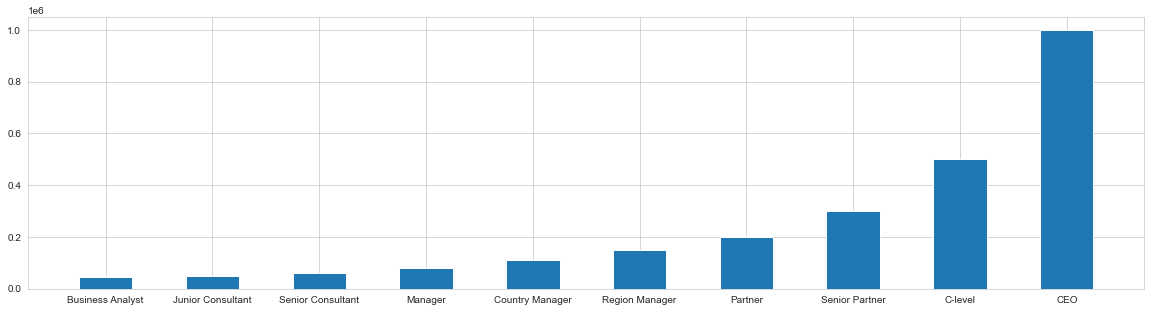

In [40]:
plt.figure(figsize=(20,5))
plt.bar(data.Position, data.Salary, width=0.5)

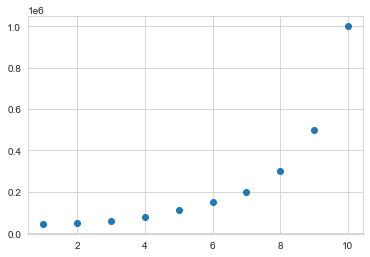

In [41]:
plt.scatter(data.Level, data.Salary)

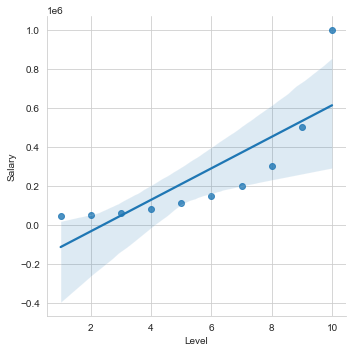

In [42]:
sns.set_style('whitegrid')
x = sns.lmplot(x = "Level", y = "Salary", data = data, legend=True )

#Above is linear regression plot, it is tries to fit the curve but not to its best. So we need to go for polynomial fit

In [43]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:,-1].values

In [44]:
print(X, "\n\n",y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] 

 [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [122]:
polyObj = PolynomialFeatures(degree=3)

In [123]:
poly_transformed_X = polyObj.fit_transform(X)

In [124]:
print(poly_transformed_X)

[[   1.    1.    1.    1.]
 [   1.    2.    4.    8.]
 [   1.    3.    9.   27.]
 [   1.    4.   16.   64.]
 [   1.    5.   25.  125.]
 [   1.    6.   36.  216.]
 [   1.    7.   49.  343.]
 [   1.    8.   64.  512.]
 [   1.    9.   81.  729.]
 [   1.   10.  100. 1000.]]


In [125]:
polyObj.get_feature_names()

['1', 'x0', 'x0^2', 'x0^3']

In [126]:
lrObj = LinearRegression()

In [127]:
lrObj.fit(poly_transformed_X, y)

LinearRegression()

In [128]:
lrObj.coef_

array([     0.        , 180664.33566432, -48548.95104895,   4120.04662005])

In [129]:
lrObj.intercept_

-121333.33333330229

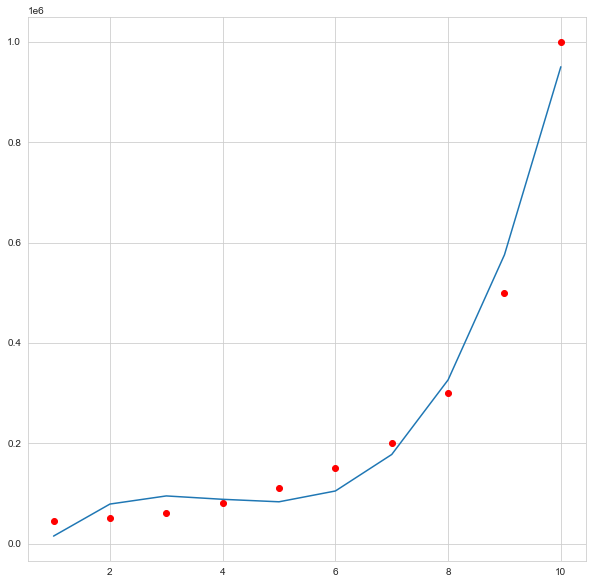

In [139]:
plt.figure(figsize=[10, 10])
plt.plot(X, lrObj.predict(polyObj.fit_transform(X)))
plt.scatter(X, y, color = 'red')

In [140]:
lrObj.predict(polyObj.fit_transform([[15]]))

array([5570275.05827481])

In [141]:
from sklearn.metrics import mean_absolute_error

In [142]:
mean_absolute_error(y, lrObj.predict(polyObj.fit_transform(X)))

34790.20979020956